In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [32]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

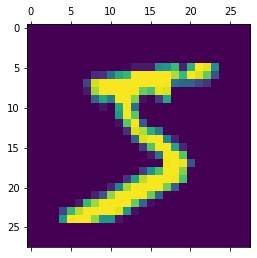

In [6]:
plt.matshow(x_train[0])

In [7]:
y_train[0]

5

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [11]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [31]:
model = keras.Sequential([
keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')]
)
call_backs = tf.keras.callbacks.TensorBoard(log_dir='logs/adam',histogram_freq=1)
model.compile(
metrics=['accuracy'],
    optimizer='adam',
    loss='sparse_categorical_crossentropy'
)

model.fit(x_train_flattened,y_train,epochs=5,callbacks=[call_backs])

Epoch 1/5
1875/1875 [==============================] - 12s 3ms/step - loss: 0.4690 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3040 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2830 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2730 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9253


In [13]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 4s 5ms/step - loss: 0.2691 - accuracy: 0.9251


[0.269054114818573, 0.9251000285148621]

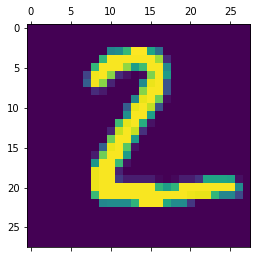

In [14]:
plt.matshow(x_test[1])

In [15]:
predictions = model.predict(x_test_flattened)

313/313 [==============================] - 2s 5ms/step


In [16]:
predictions[1]

array([5.6098145e-01, 5.4639522e-03, 9.9923635e-01, 3.4227574e-01,
       6.7430400e-10, 7.6169360e-01, 8.9230287e-01, 5.8991034e-13,
       1.1114619e-01, 2.8836820e-09], dtype=float32)

In [17]:
np.argmax(predictions[1])

2

In [18]:
prediction = [np.argmax(i) for i in predictions]

In [19]:
confusion_matrix = tf.math.confusion_matrix(predictions=prediction,labels=y_test)

In [20]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [  13,   11,  923,   17,    6,    2,   14,    8,   33,    5],
       [   4,    0,   17,  928,    1,   17,    3,    8,   24,    8],
       [   1,    2,    2,    1,  906,    0,   13,    4,    9,   44],
       [  13,    3,    3,   41,   11,  749,   20,    8,   36,    8],
       [  13,    3,    4,    1,    7,    7,  919,    2,    2,    0],
       [   2,    8,   22,    9,    6,    0,    0,  938,    2,   41],
       [  11,   10,    7,   19,    9,   17,    9,   11,  874,    7],
       [  11,    7,    1,   11,   21,    4,    0,   16,    6,  932]])>

Text(69.0, 0.5, 'Truth')

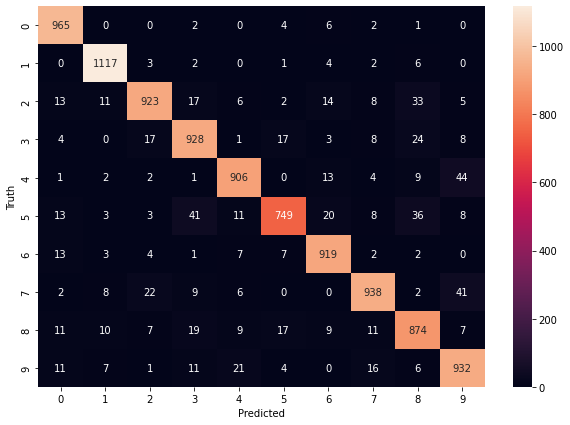

In [21]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(100,input_shape=(784,),activation='relu'),
keras.layers.Dense(10,activation='sigmoid')]
)

model.compile(
metrics=['accuracy'],
    optimizer='adam',
    loss='sparse_categorical_crossentropy'
)

model.fit(x_train,y_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 21s 4ms/step - loss: 0.2701 - accuracy: 0.9243
Epoch 2/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1244 - accuracy: 0.9636
Epoch 3/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0866 - accuracy: 0.9744
Epoch 4/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0656 - accuracy: 0.9801
Epoch 5/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0515 - accuracy: 0.9842
Epoch 6/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0406 - accuracy: 0.9875
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0336 - accuracy: 0.9898
Epoch 8/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0274 - accuracy: 0.9916


In [23]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 2ms/step - loss: 0.0842 - accuracy: 0.9745


[0.08418779820203781, 0.9745000004768372]

Text(69.0, 0.5, 'Truth')

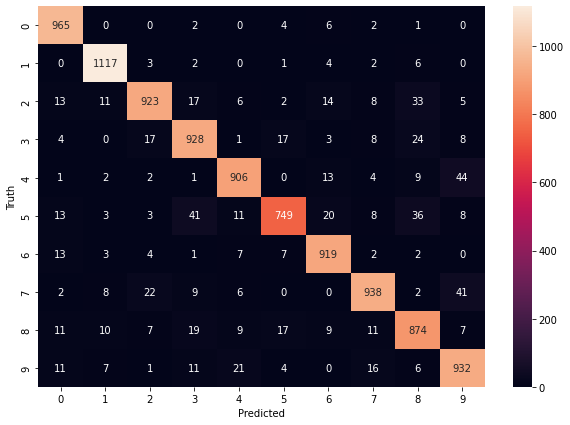

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')